In [3]:
import os 

os.environ["TORCH_HOME"]="/home/jovyan/shares/SR006.nfs2/.cache"
os.environ["HF_HOME"]="/home/jovyan/shares/SR006.nfs2/.cache"
os.environ["HUGGINGFACE_HUB_CACHE"]="/home/jovyan/shares/SR006.nfs2/.cache"
os.environ["HF_DATASETS_CACHE"]="/home/jovyan/shares/SR006.nfs2/.cache"

import datasets
import json
import numpy as np
import pandas as pd
import torch
from collections import defaultdict

from sklearn.metrics import roc_auc_score
from lm_polygraph.utils.manager import UEManager, _delete_nans, _recombine_data
from lm_polygraph.ue_metrics.risk_cov_curve import RiskCoverageCurveAUC
from lm_polygraph.ue_metrics.pred_rej_area import PredictionRejectionArea
from transformers import AutoTokenizer

prr = PredictionRejectionArea()

/home/jovyan/shares/SR006.nfs2/.mlspace/envs/tmd_ue/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# CoQA

## Vicuna 7b

In [46]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-7b-v1.5/coqa/2024-04-09/22-25-24/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'CoQA, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"CoQA, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"CoQA, Accuracy, PRR","CoQA, AlignScore, PRR"
MaximumSequenceProbability,0.485674,0.426848
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.727515,0.398484
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.716602,0.395771
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.769119,0.394056
"RelativeMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.738503,0.393038
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.755343,0.392636
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.665990,0.391263
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.744779,0.390905
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.743296,0.388285
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.740978,0.383136


In [47]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.311

## Vicuna-13b

In [49]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-13b-v1.5/coqa/2024-04-09/22-25-46/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'CoQA, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"CoQA, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"CoQA, Accuracy, PRR","CoQA, AlignScore, PRR"
MaximumSequenceProbability,0.571644,0.476971
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.669625,0.424662
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.594895,0.415991
"RelativeMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.682688,0.398452
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.582878,0.397330
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.711412,0.355334
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.614735,0.354281
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.568651,0.353172
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.598521,0.350778
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.698367,0.344116


In [50]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.398

## Mistral 7b

In [121]:
path = "lm-polygraph/workdir/output/qa/alpindale/Mistral-7B-v0.2-hf/coqa/2024-04-10/05-00-05/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'CoQA, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"CoQA, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"CoQA, Accuracy, PRR","CoQA, AlignScore, PRR"
MaximumSequenceProbability,0.085285,0.225358
Perplexity,0.086268,0.221819
MeanTokenEntropy,0.061717,0.205033
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.225555,0.001932
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.241225,-0.004349
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.229649,-0.006377
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.251100,-0.009197
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.246404,-0.011738
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.256077,-0.016848
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.199988,-0.056343


In [122]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.5705

## Gemma 7b

In [103]:
path = "../workdir/output/qa/google/gemma-7b/coqa/2024-07-03/18-32-21/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man['metrics'][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'CoQA, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"CoQA, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

,"CoQA, Accuracy, PRR","CoQA, AlignScore, PRR"
MaximumSequenceProbability,0.702563,0.519847
Perplexity,0.426600,0.450206
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.544946,0.404283
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.6)",0.544946,0.404283
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.9)",0.544946,0.404283
"TokenMahalanobisDistance_decoder (mean, Rouge-L, 0.9)",0.537390,0.401170
MeanTokenEntropy,0.290467,0.396579
"RelativeMahalanobisDistance_decoder (sum, AlignScore, 0.3)",0.572508,0.396059
"RelativeMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.584948,0.387984
"RelativeMahalanobisDistance_decoder (mean, Accuracy, 0.6)",0.584948,0.387984


In [104]:
np.mean(man['gen_metrics'][('sequence', 'Accuracy')])

0.584

/tmp/ipykernel_45993/3417078518.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")


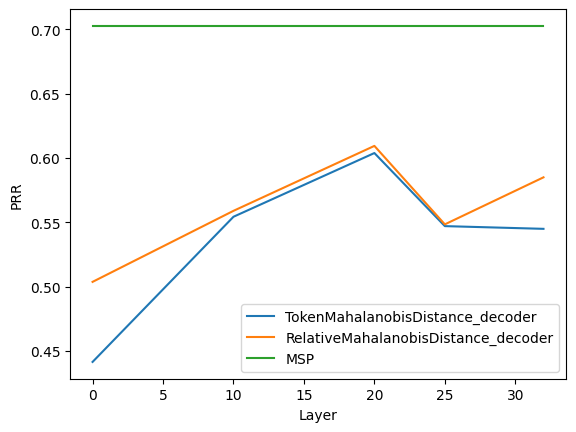

In [106]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, Accuracy, 0.3)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 32 for x in cols]
    
    plt.plot(layers, df0[cols].values[0], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

# SciQ

## Vicuna 7b

In [60]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-7b-v1.5/sciq/2024-04-09/22-25-46/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.665993,0.584277
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.644520,0.566720
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.902777,0.564961
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.697955,0.550695
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.635907,0.549770
"RelativeMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.905488,0.548268
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.629997,0.534538
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.890280,0.507877
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.927680,0.506569
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.920234,0.501223


In [54]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.211

## Vicuna 13b

In [61]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-13b-v1.5/sciq/2024-04-09/22-25-26/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.673459,0.698069
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.763938,0.687435
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.649234,0.681515
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.637699,0.670883
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.701557,0.658282
"RelativeMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.770314,0.655360
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.717094,0.637501
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.678222,0.630164
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.787178,0.626080
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.650041,0.603264


In [62]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.518

## Mistral 7b

In [124]:
path = "lm-polygraph/workdir/output/qa/alpindale/Mistral-7B-v0.2-hf/sciq/2024-04-10/05-00-23/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.9)",-0.265819,0.428868
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",-0.331701,0.414744
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",-0.259495,0.406263
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.9)",-0.326745,0.393589
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",-0.325507,0.391920
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.9)",-0.331136,0.390634
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",-0.257455,0.383041
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",-0.321503,0.374006
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",-0.325209,0.371871
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",-0.323484,0.368324


In [64]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.146

## LLama 3 8b

In [173]:
path = "../workdir/output/qa/meta-llama/Meta-Llama-3-8B/sciq/2024-07-03/15-43-35/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
"TokenMahalanobisDistance_decoder_15 (mean, alignscore, 0.5)",0.656779,0.682918
"RelativeMahalanobisDistance_decoder_15 (mean, alignscore, 0.5)",0.741308,0.669649
"TokenMahalanobisDistance_decoder_20 (mean, accuracy, 0.5)",0.774533,0.648189
"TokenMahalanobisDistance_decoder_20 (mean, alignscore, 0.5)",0.529574,0.643430
"RelativeMahalanobisDistance_decoder_10 (mean, alignscore, 0.5)",0.700582,0.627879
"TokenMahalanobisDistance_decoder_10 (mean, alignscore, 0.5)",0.631883,0.625409
"TokenMahalanobisDistance_decoder_25 (mean, accuracy, 0.5)",0.737451,0.616303
"TokenMahalanobisDistance_decoder_15 (mean, accuracy, 0.5)",0.839331,0.615493
"TokenMahalanobisDistance_decoder_10 (mean, accuracy, 0.5)",0.805607,0.606805
MaximumSequenceProbability,0.670542,0.595448


In [174]:
np.mean(man['gen_metrics'][('sequence', 'Accuracy')])

0.395

/tmp/ipykernel_45993/1744307022.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")


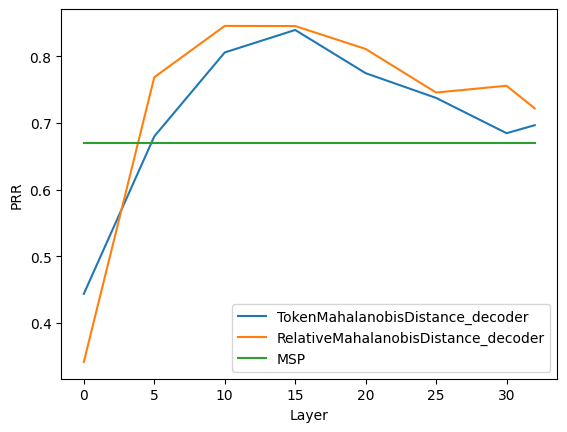

In [175]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, accuracy, 0.5)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 32 for x in cols]
    
    plt.plot(layers, df0[cols].values[0], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

## Gemma 7b

In [100]:
path = "../workdir/output/qa/google/gemma-7b/sciq/2024-07-03/22-16-46/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
MaximumSequenceProbability,0.805579,0.680259
"RelativeMahalanobisDistance_decoder_20 (mean, AlignScore, 0.9)",0.644656,0.668175
"TokenMahalanobisDistance_decoder_20 (mean, AlignScore, 0.9)",0.639502,0.663961
"RelativeMahalanobisDistance_decoder_20 (mean, AlignScore, 0.6)",0.627996,0.663506
"TokenMahalanobisDistance_decoder_20 (mean, AlignScore, 0.6)",0.615628,0.657833
"RelativeMahalanobisDistance_decoder_20 (mean, AlignScore, 0.3)",0.624835,0.655093
"RelativeMahalanobisDistance_decoder_20 (mean, Rouge-L, 0.3)",0.634008,0.654124
"RelativeMahalanobisDistance_decoder_20 (mean, Rouge-L, 0.6)",0.646858,0.652497
"TokenMahalanobisDistance_decoder_20 (mean, AlignScore, 0.3)",0.612940,0.651092
"RelativeMahalanobisDistance_decoder_20 (mean, Rouge-L, 0.9)",0.718926,0.650226


In [5]:
np.mean(man['gen_metrics'][('sequence', 'Accuracy')])

0.549

/tmp/ipykernel_45993/3417078518.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")


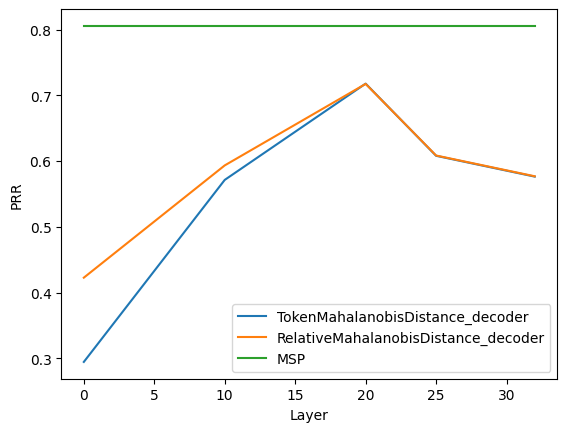

In [102]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, Accuracy, 0.3)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 32 for x in cols]
    
    plt.plot(layers, df0[cols].values[0], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

# TriviaQA

## Vicuna 7b

In [65]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-7b-v1.5/['trivia_qa', 'rc.nocontext']/2024-04-09/22-25-24/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'TriviaQA, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"TriviaQA, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"TriviaQA, Accuracy, PRR","TriviaQA, AlignScore, PRR"
MaximumSequenceProbability,0.547689,0.572455
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.581011,0.420545
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.577732,0.416744
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.595045,0.413152
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.563798,0.398236
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.438955,0.334290
MeanTokenEntropy,0.127140,0.329241
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.516962,0.328341
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.428726,0.324810
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.542539,0.318825


In [66]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.335

## Vicuna 13b

In [67]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-13b-v1.5/['trivia_qa', 'rc.nocontext']/2024-04-09/22-25-24/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'TriviaQA, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"TriviaQA, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"TriviaQA, Accuracy, PRR","TriviaQA, AlignScore, PRR"
MaximumSequenceProbability,0.649271,0.596263
MeanTokenEntropy,0.473291,0.581673
Perplexity,0.493253,0.548530
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.490199,0.410863
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.483249,0.400115
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.541686,0.382376
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.466970,0.341137
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.538213,0.331156
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.438831,0.329843
"RelativeMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.509496,0.313983


In [68]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.528

## Mistral 7b

In [126]:
path = "lm-polygraph/workdir/output/qa/alpindale/Mistral-7B-v0.2-hf/['trivia_qa', 'rc.nocontext']/2024-04-10/05-00-05/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'TriviaQA, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"TriviaQA, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"TriviaQA, Accuracy, PRR","TriviaQA, AlignScore, PRR"
MeanTokenEntropy,0.088757,0.269215
MaximumSequenceProbability,0.069616,0.258446
Perplexity,0.069616,0.258446
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.344637,0.138475
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.344637,0.138475
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.377890,0.130340
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.377890,0.130340
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.398288,0.118540
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.398288,0.118540
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.347659,0.115769


In [127]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.558

## Gemma

In [107]:
path = "../workdir/output/qa/google/gemma-7b/['trivia_qa', 'rc.nocontext']/2024-07-04/01-41-50/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
MaximumSequenceProbability,0.830297,0.786661
Perplexity,0.822510,0.782402
MeanTokenEntropy,0.805005,0.777207
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.409310,0.418304
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.9)",0.409310,0.418304
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.6)",0.409310,0.418304
"TokenMahalanobisDistance_decoder (mean, AlignScore, 0.9)",0.407561,0.417829
"TokenMahalanobisDistance_decoder (mean, Rouge-L, 0.9)",0.412654,0.416316
"TokenMahalanobisDistance_decoder (mean, Rouge-L, 0.6)",0.408712,0.412815
"TokenMahalanobisDistance_decoder (mean, AlignScore, 0.6)",0.397106,0.409786


/tmp/ipykernel_45993/806350166.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")


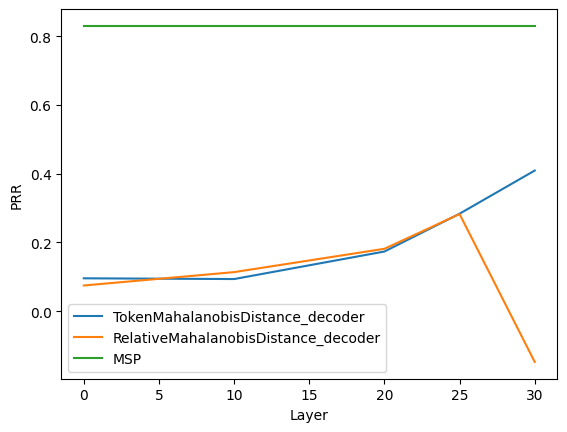

In [110]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, Accuracy, 0.3)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 30 for x in cols]
    
    plt.plot(layers, df0[cols].values[0], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

In [14]:
np.mean(man['gen_metrics'][('sequence', 'Accuracy')])

0.551

# MMLU

## Vicuna 7b

In [74]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-7b-v1.5/['cais/mmlu', 'all']/2024-04-09/22-25-26/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'MMLU, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"MMLU, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"MMLU, Accuracy, PRR"
MeanTokenEntropy,0.474275
MaximumSequenceProbability,0.449569
Perplexity,0.449569
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.250325
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.250325
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.248022
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.248022
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.220600
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.220600
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.219658


In [75]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.403

## Vicuna 13b

In [76]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-13b-v1.5/['cais/mmlu', 'all']/2024-04-09/22-25-26/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'MMLU, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"MMLU, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"MMLU, Accuracy, PRR"
MeanTokenEntropy,0.653613
MaximumSequenceProbability,0.642444
Perplexity,0.642444
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.160387
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.160387
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.158379
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.158379
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.127214
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.127214
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.127011


In [77]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.4865

## Mistral 7b

In [129]:
path = "lm-polygraph/workdir/output/qa/alpindale/Mistral-7B-v0.2-hf/['cais/mmlu', 'all']/2024-04-10/05-00-23/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'MMLU, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"MMLU, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"MMLU, Accuracy, PRR"
MeanTokenEntropy,0.695688
MaximumSequenceProbability,0.678909
Perplexity,0.678909
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.151506
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.151506
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.150787
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.150787
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.111301
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.111301
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.111301


In [79]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.5575

# GSM8k

## Vicuna 7b

In [80]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-7b-v1.5/['gsm8k', 'main']/2024-04-09/23-14-31/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'GSM8k, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"GSM8k, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"GSM8k, Accuracy, PRR"
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.457930
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.448746
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.431895
"RelativeMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.430294
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.425684
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.412565
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.411843
MaximumSequenceProbability,0.372873
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.360804
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.339123


In [81]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.129

## Vicuna 13b

In [82]:
path = "lm-polygraph/workdir/output/qa/lmsys/vicuna-13b-v1.5/['gsm8k', 'main']/2024-04-09/23-14-30/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'GSM8k, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"GSM8k, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"GSM8k, Accuracy, PRR"
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.581796
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.542334
"RelativeMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.531925
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.528363
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.522828
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.518332
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.509051
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.9)",0.502940
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.492718
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.9)",0.486378


In [83]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.191

## Mistral 7b

In [131]:
path = "lm-polygraph/workdir/output/qa/alpindale/Mistral-7B-v0.2-hf/['gsm8k', 'main']/2024-04-09/23-14-29/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Accuracy']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'GSM8k, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"GSM8k, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"GSM8k, Accuracy, PRR"
"TokenMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.319444
"TokenMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.319444
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.310199
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.310199
"RelativeMahalanobisDistance_decoder (sum, accuracy, 1.0)",0.307177
"RelativeMahalanobisDistance_decoder (mean, accuracy, 1.0)",0.307177
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.299965
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.299965
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.287797
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.287797


In [85]:
np.mean(man.gen_metrics[('sequence', 'Accuracy')])

0.323

## Gemma 7b

In [156]:
path = "../workdir/output/qa/google/gemma-7b/['gsm8k', 'main']/2024-07-03/18-32-16/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-2]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
"TokenMahalanobisDistance_decoder_20 (mean, Accuracy, 0.3)",0.605299,0.325393
"TokenMahalanobisDistance_decoder_20 (mean, Rouge-L, 0.3)",0.579619,0.309603
"TokenMahalanobisDistance_decoder_20 (mean, AlignScore, 0.3)",0.558837,0.308469
"RelativeMahalanobisDistance_decoder_20 (mean, Accuracy, 0.3)",0.548609,0.219331
"TokenMahalanobisDistance_decoder_25 (mean, Accuracy, 0.3)",0.547615,0.316009
"TokenMahalanobisDistance_decoder_20 (mean, , 0)",0.537361,0.282027
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.535684,0.295627
"TokenMahalanobisDistance_decoder_25 (mean, Rouge-L, 0.3)",0.528034,0.309057
"TokenMahalanobisDistance_decoder (mean, Rouge-L, 0.3)",0.521782,0.292749
"RelativeMahalanobisDistance_decoder_20 (mean, Rouge-L, 0.3)",0.516010,0.198060


/tmp/ipykernel_45993/3417078518.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")


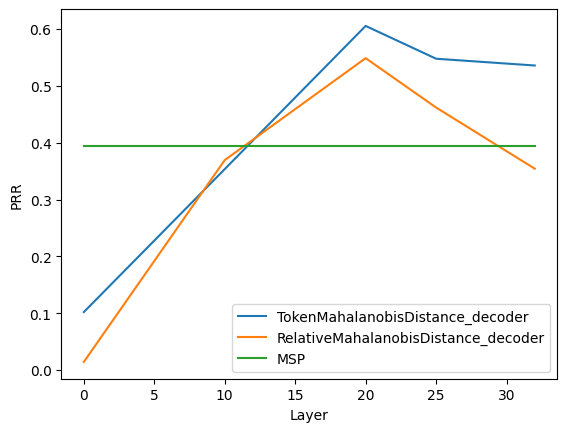

In [157]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, Accuracy, 0.3)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 32 for x in cols]
    
    plt.plot(layers, df0[cols].values[0], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

In [158]:
np.mean(man['gen_metrics'][('sequence', 'Accuracy')])

0.568

## Llama 3

In [6]:
path = "../workdir/output_layers/qa/meta-llama/Meta-Llama-3-8B/['gsm8k', 'main']/2024-07-09/10-13-16/ue_manager_seed1"
man = torch.load(path)
metric_names = ['Accuracy']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR"
MaximumSequenceProbability,0.717325
Perplexity,0.717325
MeanTokenEntropy,0.642937
MahalanobisDistanceSeq_decoder,0.352469
"TokenMahalanobisDistance_decoder (mean, , 0)",0.097424
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.097424
"TokenMahalanobisDistance_decoder (mean, AlignScore, 0.3)",0.097424
"RelativeMahalanobisDistance_decoder (mean, Accuracy, 0.3)",-0.225279
"RelativeMahalanobisDistance_decoder (mean, AlignScore, 0.3)",-0.225279
"RelativeMahalanobisDistance_decoder (mean, , 0)",-0.267787


In [8]:
man["estimations"][('sequence', 'TokenMahalanobisDistance_decoder (mean, , 0)')]

[1709.782958984375,
 1588.97314453125,
 1667.5653076171875,
 1943.2642822265625,
 1752.0635986328125,
 1769.36669921875,
 1841.2806396484375,
 1886.8526611328125,
 1250.525634765625,
 1611.755859375]

In [159]:
path = "../workdir/output/qa/meta-llama/Meta-Llama-3-8B/['gsm8k', 'main']/2024-07-04/04-09-02/ue_manager_seed1"
man = torch.load(path)
metric_names = ['Accuracy']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR"
"TokenMahalanobisDistance_decoder_20 (mean, Accuracy, 0.3)",0.585455
"RelativeMahalanobisDistance_decoder_20 (mean, Accuracy, 0.3)",0.571641
"TokenMahalanobisDistance_decoder_20 (mean, Rouge-L, 0.3)",0.559192
"TokenMahalanobisDistance_decoder_20 (mean, AlignScore, 0.3)",0.553778
"RelativeMahalanobisDistance_decoder_20 (mean, Rouge-L, 0.3)",0.544608
"RelativeMahalanobisDistance_decoder_20 (mean, AlignScore, 0.3)",0.541879
"TokenMahalanobisDistance_decoder_20 (mean, , 0)",0.540727
"RelativeMahalanobisDistance_decoder_20 (mean, , 0)",0.525735
"RelativeMahalanobisDistance_decoder_30 (mean, Accuracy, 0.3)",0.515524
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.514192


/tmp/ipykernel_45993/3417078518.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")


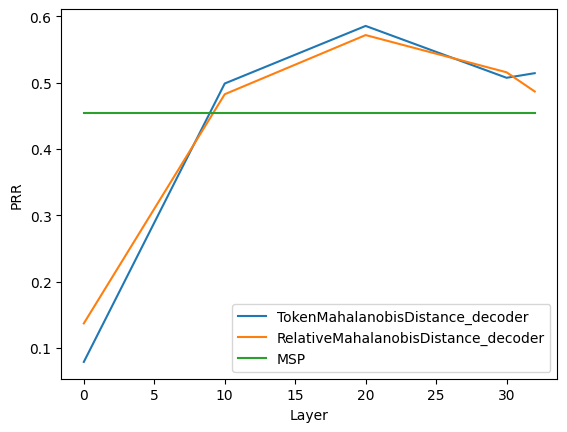

In [160]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, Accuracy, 0.3)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 32 for x in cols]
    
    plt.plot(layers, df0[cols].values[0], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

In [93]:
np.mean(man['gen_metrics'][('sequence', 'Accuracy')])

0.536

# XSUM

## Vicuna 7b

In [87]:
path = "lm-polygraph/workdir/output/ats/lmsys/vicuna-7b-v1.5/xsum/2024-04-09/23-14-30/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Rouge_rougeL', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'XSUM, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"XSUM, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"XSUM, Rouge_rougeL, PRR","XSUM, AlignScore, PRR"
MeanTokenEntropy,0.024997,0.148440
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.075167,0.109446
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.126173,0.109117
Perplexity,0.017226,0.090535
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.040631,0.020652
MaximumSequenceProbability,-0.009734,0.019434
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",-0.055818,0.000061
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.062274,-0.038587
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.067524,-0.050990
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.037828,-0.059794


In [88]:
np.mean(man.gen_metrics[('sequence', 'AlignScore')])

0.0621609894928406

## Vicuna 13b

In [89]:
path = "lm-polygraph/workdir/output/ats/lmsys/vicuna-13b-v1.5/xsum/2024-04-09/23-14-29/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Rouge_rougeL', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'XSUM, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"XSUM, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"XSUM, Rouge_rougeL, PRR","XSUM, AlignScore, PRR"
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.127219,0.187453
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.160918,0.167808
MeanTokenEntropy,0.088062,0.151454
Perplexity,0.084116,0.135020
MaximumSequenceProbability,0.135675,0.120805
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.085816,0.112239
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.173773,0.081399
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.159304,0.056370
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.144362,0.023399
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.052968,-0.013338


In [90]:
np.mean(man.gen_metrics[('sequence', 'AlignScore')])

0.08629431277797267

## Mistral 7b

In [133]:
path = "lm-polygraph/workdir/output/ats/alpindale/Mistral-7B-v0.2-hf/xsum/2024-04-09/23-14-31/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Rouge_rougeL', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'XSUM, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"XSUM, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"XSUM, Rouge_rougeL, PRR","XSUM, AlignScore, PRR"
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.334371,0.103817
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.347345,0.080410
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",-0.194326,0.067441
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",-0.189549,0.066426
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.365192,0.014786
Perplexity,-0.295978,0.013115
MeanTokenEntropy,-0.274470,0.009041
MaximumSequenceProbability,-0.092869,-0.001631
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",-0.213619,-0.019585
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",-0.019231,-0.020377


In [134]:
np.mean(man.gen_metrics[('sequence', 'AlignScore')]), np.mean(man.gen_metrics[('sequence', 'Rouge_rougeL')])

(0.034991165048508265, 0.20618126565166967)

## Stablm 12b

In [136]:
path = "lm-polygraph/workdir/output/ats/stabilityai/stablelm-2-12b/xsum/2024-04-10/05-39-18/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Rouge_rougeL', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'XSUM, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"XSUM, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"XSUM, Rouge_rougeL, PRR","XSUM, AlignScore, PRR"
Perplexity,-0.094104,0.073626
MeanTokenEntropy,-0.086495,0.066653
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",-0.040553,0.048430
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.022527,0.039754
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.0)",-0.033884,0.034142
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",-0.025711,0.006194
MaximumSequenceProbability,0.156525,0.001631
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.308204,-0.055999
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.307004,-0.056375
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.326880,-0.069938


In [137]:
np.mean(man.gen_metrics[('sequence', 'AlignScore')])

0.08725634816825187

## LLama 

In [126]:
path = "../workdir/output/ats/meta-llama/Meta-Llama-3-8B/xsum/2024-07-04/04-09-02/ue_manager_seed1"
man = torch.load(path)

metric_names = ['RougeL', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-2]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, RougeL, PRR","SciQ, AlignScore, PRR"
"RelativeMahalanobisDistance_decoder_30 (sum, , 0)",0.096371,0.096371
"RelativeMahalanobisDistance_decoder_30 (sum, Accuracy, 0.3)",0.096371,0.096371
"TokenMahalanobisDistance_decoder_0 (mean, , 0)",0.070028,0.070028
"TokenMahalanobisDistance_decoder_0 (mean, Accuracy, 0.3)",0.070028,0.070028
"TokenMahalanobisDistance_decoder_0 (mean, AlignScore, 0.3)",0.062721,0.062721
"RelativeMahalanobisDistance_decoder (sum, Accuracy, 0.3)",0.061622,0.061622
"RelativeMahalanobisDistance_decoder (sum, , 0)",0.061622,0.061622
"RelativeMahalanobisDistance_decoder_0 (mean, AlignScore, 0.3)",0.059758,0.059758
"RelativeMahalanobisDistance_decoder_10 (sum, , 0)",0.057104,0.057104
"RelativeMahalanobisDistance_decoder_10 (sum, Accuracy, 0.3)",0.057104,0.057104


/tmp/ipykernel_45993/1930615668.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][1]]*len(layers), label="MSP")


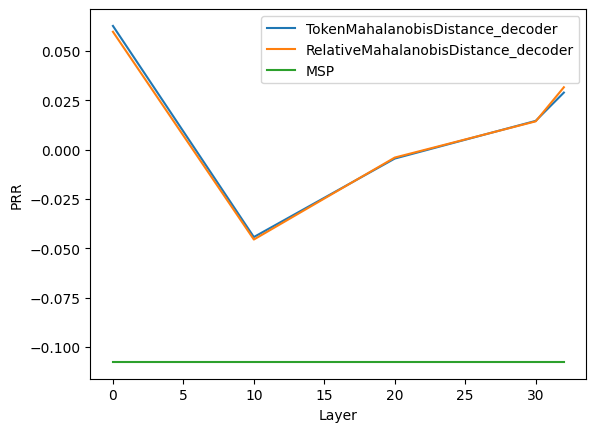

In [127]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, AlignScore, 0.3)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 32 for x in cols]
    
    plt.plot(layers, df0[cols].values[1], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][1]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

## Gemma 7b

In [131]:
path = "../workdir/output/ats/google/gemma-7b/xsum/2024-07-03/18-32-16/ue_manager_seed1"
man = torch.load(path)

metric_names = ['RougeL', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-2]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, RougeL, PRR","SciQ, AlignScore, PRR"
"RelativeMahalanobisDistance_decoder (mean, AlignScore, 0.3)",0.093400,0.093400
"RelativeMahalanobisDistance_decoder (sum, AlignScore, 0.3)",0.087578,0.087578
"RelativeMahalanobisDistance_decoder (sum, Rouge-L, 0.3)",0.043596,0.043596
"RelativeMahalanobisDistance_decoder_25 (mean, , 0)",0.041340,0.041340
"RelativeMahalanobisDistance_decoder_25 (mean, Accuracy, 0.3)",0.041340,0.041340
"RelativeMahalanobisDistance_decoder (mean, , 0)",0.038951,0.038951
"RelativeMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.038951,0.038951
"RelativeMahalanobisDistance_decoder_10 (mean, , 0)",0.034210,0.034210
"RelativeMahalanobisDistance_decoder_10 (mean, Accuracy, 0.3)",0.034210,0.034210
"RelativeMahalanobisDistance_decoder (mean, Rouge-L, 0.3)",0.033879,0.033879


/tmp/ipykernel_45993/2702456290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][1]]*len(layers), label="MSP")


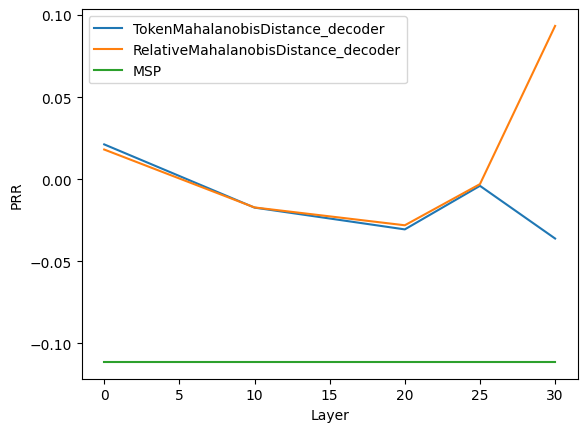

In [133]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, AlignScore, 0.3)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 30 for x in cols]
    
    plt.plot(layers, df0[cols].values[1], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][1]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

In [19]:
np.mean(man['gen_metrics'][('sequence', 'AlignScore')])

0.03941326216568268

# WMT 14 De-En

## Vicuna 7b

In [110]:
path = "lm-polygraph/workdir/output/nmt/lmsys/vicuna-7b-v1.5/['wmt14', 'de-en']/2024-04-09/23-14-31/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Comet', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'WMT14 De-En, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"WMT14 De-En, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"WMT14 De-En, Comet, PRR","WMT14 De-En, AlignScore, PRR"
MeanTokenEntropy,0.274388,0.551702
Perplexity,0.233358,0.512977
MaximumSequenceProbability,0.244103,0.480413
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.199104,0.224835
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.193842,0.223493
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.143306,0.116263
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.140829,0.114453
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.131894,0.109233
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.136024,0.101627
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.068077,0.048075


In [111]:
np.mean(man.gen_metrics[('sequence', 'Comet')])

0.8373594695329666

In [112]:
path = "lm-polygraph/workdir/output/nmt/lmsys/vicuna-13b-v1.5/['wmt14', 'de-en']/2024-04-09/23-14-31/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Comet', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'WMT14 De-En, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"WMT14 De-En, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"WMT14 De-En, Comet, PRR","WMT14 De-En, AlignScore, PRR"
MeanTokenEntropy,0.258356,0.542357
Perplexity,0.238769,0.493736
MaximumSequenceProbability,0.216374,0.431071
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.229777,0.342794
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.232429,0.341478
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.166717,0.157677
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.163551,0.154636
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.165375,0.123471
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.162751,0.115593
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.036914,0.010969


In [113]:
np.mean(man.gen_metrics[('sequence', 'Comet')])

0.8482999328076839

## Mistral 7b

In [114]:
path = "lm-polygraph/workdir/output/nmt/alpindale/Mistral-7B-v0.2-hf/['wmt14', 'de-en']/2024-04-10/05-39-15/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Comet', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'WMT14 De-En, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"WMT14 De-En, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"WMT14 De-En, Comet, PRR","WMT14 De-En, AlignScore, PRR"
MeanTokenEntropy,0.008118,0.100074
MaximumSequenceProbability,-0.027159,0.033613
Perplexity,-0.022617,0.029431
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.174806,-0.557457
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.174661,-0.557478
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.175602,-0.559307
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.175552,-0.559364
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.077897,-0.568182
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.080204,-0.569053
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.101214,-0.596230


In [116]:
np.mean(man.gen_metrics[('sequence', 'Comet')])

0.5119356378316879

## Stablm 12b

In [119]:
path = "lm-polygraph/workdir/output/nmt/stabilityai/stablelm-2-12b/['wmt14', 'de-en']/2024-04-10/05-39-15/ue_manager_seed1"
man = UEManager.load(path)

metric_names = ['Comet', 'AlignScore']
df = {}
for key in man.metrics.keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man.metrics[key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'WMT14 De-En, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"WMT14 De-En, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x7fc48b67cf40>]


,"WMT14 De-En, Comet, PRR","WMT14 De-En, AlignScore, PRR"
MaximumSequenceProbability,0.262681,0.729212
MeanTokenEntropy,0.247645,0.587531
Perplexity,0.249943,0.579881
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.080823,0.449890
"TokenMahalanobisDistance_decoder (sum, alignscore, 0.0)",0.080889,0.449403
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.156284,0.016247
"TokenMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.147046,-0.058706
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.5)",0.123638,-0.625219
"RelativeMahalanobisDistance_decoder (mean, alignscore, 0.0)",0.123479,-0.649622
"RelativeMahalanobisDistance_decoder (sum, alignscore, 0.5)",0.097356,-0.761433


In [120]:
np.mean(man.gen_metrics[('sequence', 'Comet')])

0.822441279232502

## Gemma 7b

In [21]:
path = "../workdir/output/nmt/google/gemma-7b/['wmt14', 'de-en']/2024-07-04/00-23-51/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Comet', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-2]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Comet, PRR","SciQ, AlignScore, PRR"
MeanTokenEntropy,0.236713,0.515602
Perplexity,0.219401,0.517674
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.199091,0.296064
"RelativeMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.193679,0.282106
"TokenMahalanobisDistance_decoder (mean, AlignScore, 0.3)",0.176535,0.234058
"TokenMahalanobisDistance_decoder (mean, Rouge-L, 0.3)",0.176397,0.234343
"TokenMahalanobisDistance_decoder (mean, , 0)",0.174233,0.232726
"RelativeMahalanobisDistance_decoder_20 (mean, Rouge-L, 0.3)",0.174197,0.144511
"RelativeMahalanobisDistance_decoder_20 (mean, AlignScore, 0.3)",0.171717,0.144212
"RelativeMahalanobisDistance_decoder_25 (mean, AlignScore, 0.3)",0.170751,0.113226


In [22]:
np.mean(man['gen_metrics'][('sequence', 'Comet')])

0.8509953519105912

# MMLU

In [134]:
path = "../workdir/output/qa/{'path': 'google/gemma-7b', 'ensemble': False, 'mc': False, 'mc_seeds': None, 'dropout_rate': None, 'device_map': 'auto', 'attn_implementation': 'eager'}/['cais/mmlu', 'all']/2024-07-04/00-23-51/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-2]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
Perplexity,0.684251,0.680102
MaximumSequenceProbability,0.684251,0.680102
MeanTokenEntropy,0.666180,0.662203
"RelativeMahalanobisDistance_decoder_10 (mean, Rouge-L, 0.3)",0.260932,0.259156
"RelativeMahalanobisDistance_decoder_10 (mean, AlignScore, 0.3)",0.260932,0.259156
"RelativeMahalanobisDistance_decoder_10 (sum, AlignScore, 0.3)",0.260932,0.259156
"RelativeMahalanobisDistance_decoder_10 (sum, Accuracy, 0.3)",0.260932,0.259156
"RelativeMahalanobisDistance_decoder_10 (sum, Rouge-L, 0.3)",0.260932,0.259156
"RelativeMahalanobisDistance_decoder_10 (mean, Accuracy, 0.3)",0.260932,0.259156
"RelativeMahalanobisDistance_decoder_10 (sum, , 0)",0.218426,0.217390


In [135]:
np.mean(man['gen_metrics'][('sequence', 'Accuracy')])

0.659

/tmp/ipykernel_45993/1771217357.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")


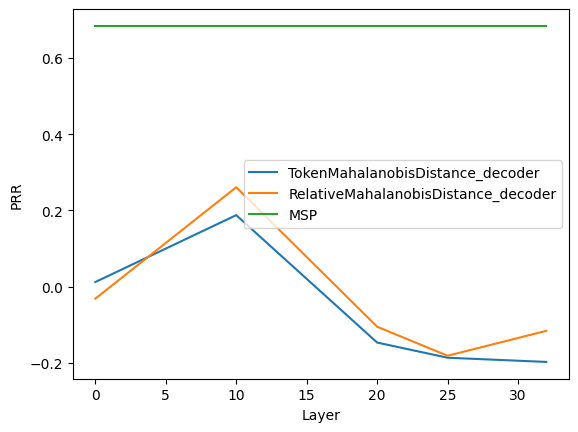

In [136]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, AlignScore, 0.3)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 32 for x in cols]
    
    plt.plot(layers, df0[cols].values[0], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][0]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

# TruthFulQA 

In [88]:
#path = "../workdir/output/qa/google/gemma-7b/['truthful_qa', 'generation']/2024-07-04/09-12-59/ue_manager_seed1"
path = "../workdir/output_layers/qa/google/gemma-7b/['truthful_qa', 'generation']/2024-07-08/17-39-19/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-2]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
MaximumSequenceProbability,0.644227,0.201462
"TokenMahalanobisDistance_decoder_20 (mean, Accuracy, 0.3)",0.580827,0.172404
"AverageTokenMahalanobisDistance_decoder18,19,20,21,22,23,24,25,26,-1 (mean, Accuracy, 0.3)",0.572383,0.253516
"TokenMahalanobisDistance_decoder (mean, Accuracy, 0.3)",0.524475,0.240298
"TokenMahalanobisDistance_decoder_25 (mean, Accuracy, 0.3)",0.511502,0.278168
Perplexity,0.497184,0.373512
MeanTokenEntropy,0.323442,0.321359
"TokenMahalanobisDistance_decoder_20 (mean, AlignScore, 0.3)",0.305356,0.185028
"TokenMahalanobisDistance_decoder (mean, AlignScore, 0.3)",0.280845,0.207531
"AverageTokenMahalanobisDistance_decoder18,19,20,21,22,23,24,25,26,-1 (mean, AlignScore, 0.3)",0.243493,0.219113


In [258]:
#path = "../workdir/output/qa/google/gemma-7b/['truthful_qa', 'generation']/2024-07-04/09-12-59/ue_manager_seed1"
path = "../workdir/output/qa/google/gemma-7b/['truthful_qa', 'generation']/2024-07-05/13-17-07/ue_manager_seed1"
man = torch.load(path)

metric_names = ['Accuracy', 'AlignScore']
df = {}
for key in man['metrics'].keys():
    if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
        scores = df.get(key[1], [])
        scores.append(man["metrics"][key])
        df[key[1]] = scores
        
df0 = pd.DataFrame(df, index=[f'SciQ, {m}, PRR' for m in metric_names])  
df0.T.sort_values(f"SciQ, {metric_names[-1]}, PRR", ascending=False).style.background_gradient(axis=0)

,"SciQ, Accuracy, PRR","SciQ, AlignScore, PRR"
MeanTokenEntropy,0.228374,0.306074
Perplexity,0.381126,0.299013
"RelativeMahalanobisDistance_decoder_17 (mean, AlignScore, 0.6)",0.470648,0.298506
"TokenMahalanobisDistance_decoder_17 (mean, AlignScore, 0.6)",0.468409,0.296130
"RelativeMahalanobisDistance_decoder_21 (mean, AlignScore, 0.6)",0.403523,0.295010
"RelativeMahalanobisDistance_decoder_18 (mean, AlignScore, 0.9)",0.483823,0.289681
"TokenMahalanobisDistance_decoder_18 (mean, AlignScore, 0.9)",0.483810,0.289088
"TokenMahalanobisDistance_decoder_21 (mean, AlignScore, 0.6)",0.398624,0.289050
"RelativeMahalanobisDistance_decoder_18 (mean, AlignScore, 0.6)",0.466496,0.288324
"RelativeMahalanobisDistance_decoder_26 (mean, AlignScore, 0.9)",0.313416,0.286682


In [259]:
np.mean(man['gen_metrics'][('sequence', 'Accuracy')])

0.06601466992665037

/tmp/ipykernel_45993/2890486429.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0['MaximumSequenceProbability'][1]]*len(layers), label="MSP")


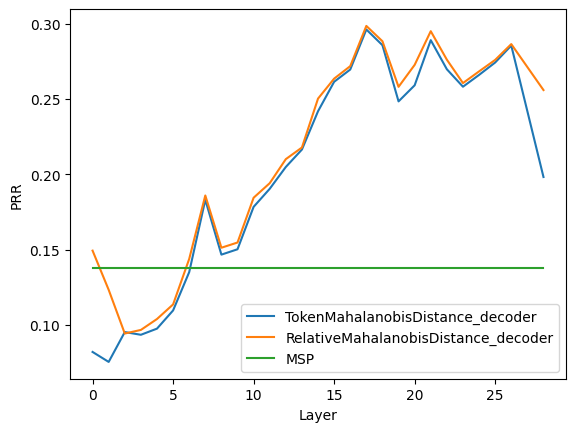

In [276]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, AlignScore, 0.6)"):
    return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]
for name in names:
    cols = [x for x in df0.columns if check_cond(x, name)]
    layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 28 for x in cols]
    
    plt.plot(layers, df0[cols].values[1], label=name)
plt.plot(layers, [df0['MaximumSequenceProbability'][1]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PRR")
plt.legend()

# Average

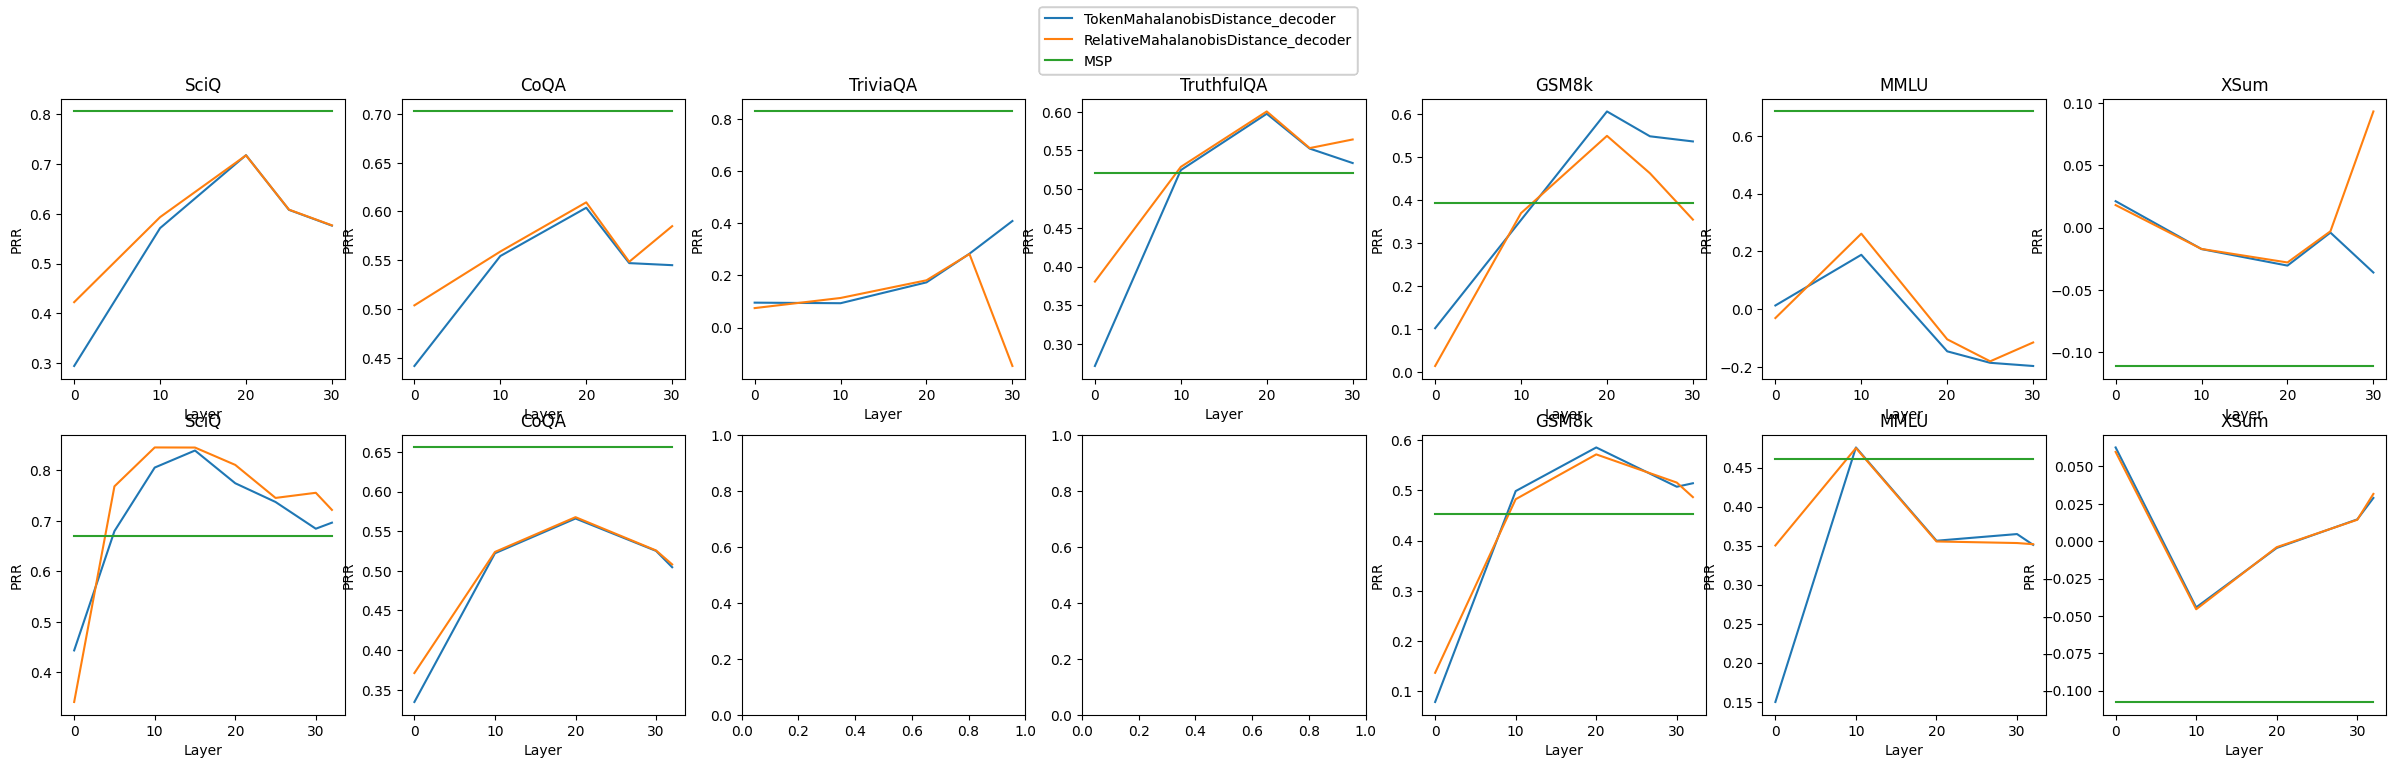

In [3]:
import matplotlib.pyplot as plt


paths_g = [
    "../workdir/output/qa/google/gemma-7b/sciq/2024-07-03/22-16-46/ue_manager_seed1",
    "../workdir/output/qa/google/gemma-7b/coqa/2024-07-03/18-32-21/ue_manager_seed1",
    "../workdir/output/qa/google/gemma-7b/['trivia_qa', 'rc.nocontext']/2024-07-04/01-41-50/ue_manager_seed1",
    "../workdir/output/qa/google/gemma-7b/['truthful_qa', 'generation']/2024-07-04/09-12-59/ue_manager_seed1",
    "../workdir/output/qa/google/gemma-7b/['gsm8k', 'main']/2024-07-03/18-32-16/ue_manager_seed1",
    "../workdir/output/qa/{'path': 'google/gemma-7b', 'ensemble': False, 'mc': False, 'mc_seeds': None, 'dropout_rate': None, 'device_map': 'auto', 'attn_implementation': 'eager'}/['cais/mmlu', 'all']/2024-07-04/00-23-51/ue_manager_seed1",
    "../workdir/output/ats/google/gemma-7b/xsum/2024-07-03/18-32-16/ue_manager_seed1",
]

paths_l = [
    "../workdir/output/qa/meta-llama/Meta-Llama-3-8B/sciq/2024-07-03/15-43-35/ue_manager_seed1",
    "../workdir/output/qa/meta-llama/Meta-Llama-3-8B/coqa/2024-07-04/11-11-14/ue_manager_seed1",
    "",
    "",
    "../workdir/output/qa/meta-llama/Meta-Llama-3-8B/['gsm8k', 'main']/2024-07-04/04-09-02/ue_manager_seed1",    
    "../workdir/output/qa/meta-llama/Meta-Llama-3-8B/['cais/mmlu', 'all']/2024-07-04/10-30-58/ue_manager_seed1",
    "../workdir/output/ats/meta-llama/Meta-Llama-3-8B/xsum/2024-07-04/04-09-02/ue_manager_seed1"
]
ds = ['SciQ', "CoQA", "TriviaQA", "TruthfulQA", "GSM8k", "MMLU", "XSum"]

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, Accuracy, 0.3)"):
        return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]

fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 8))

for k, (d_name, path) in enumerate(zip(ds, paths_g)):
    man = torch.load(path)
    metric_names = ['Accuracy', 'AlignScore']
    df = {}
    for key in man['metrics'].keys():
        if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
            scores = df.get(key[1], [])
            scores.append(man["metrics"][key])
            df[key[1]] = scores
            
    df0 = pd.DataFrame(df, index=[f'{d_name}, {m}, PRR' for m in metric_names])  
    if d_name == "SciQ":
        suf = "(mean, Accuracy, 0.3)"
        i = 0
    elif d_name == "XSum":
        suf = "(mean, AlignScore, 0.3)"
        i = 1
    else:
        suf="(mean, Accuracy, 0.3)"
        i = 0
    for name in names:
        cols = [x for x in df0.columns if check_cond(x, name, suf)]
        layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 30 for x in cols]
        
        ax[0, k].plot(layers, df0[cols].values[i], label=name)
        
    ax[0, k].plot(layers, [df0['MaximumSequenceProbability'].iloc[i]]*len(layers), label="MSP")
    ax[0, k].set_xlabel("Layer")
    ax[0, k].set_ylabel("PRR")
    #ax[0, k].legend()
    ax[0, k].set_title(d_name)
    handles, labels = ax[0, k].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center')

for k, (d_name, path) in enumerate(zip(ds, paths_l)):
    if not len(path):
        continue
    man = torch.load(path)
    metric_names = ['Accuracy', 'AlignScore']
    df = {}
    for key in man['metrics'].keys():
        if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
            scores = df.get(key[1], [])
            scores.append(man["metrics"][key])
            df[key[1]] = scores
            
    df0 = pd.DataFrame(df, index=[f'{d_name}, {m}, PRR' for m in metric_names])  
    if d_name == "SciQ":
        suf = "(mean, accuracy, 0.5)"
        i = 0
    elif d_name == "XSum":
        suf = "(mean, AlignScore, 0.3)"
        i = 1
    else:
        suf="(mean, Accuracy, 0.3)"
        i = 0
    for name in names:
        cols = [x for x in df0.columns if check_cond(x, name, suf)]
        layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 32 for x in cols]
        
        ax[1, k].plot(layers, df0[cols].values[i], label=name)
        
    ax[1, k].plot(layers, [df0['MaximumSequenceProbability'].iloc[i]]*len(layers), label="MSP")
    ax[1, k].set_xlabel("Layer")
    ax[1, k].set_ylabel("PRR")
    #ax[0, k].legend()
    ax[1, k].set_title(d_name)
    #handles, labels = ax[1, k].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')

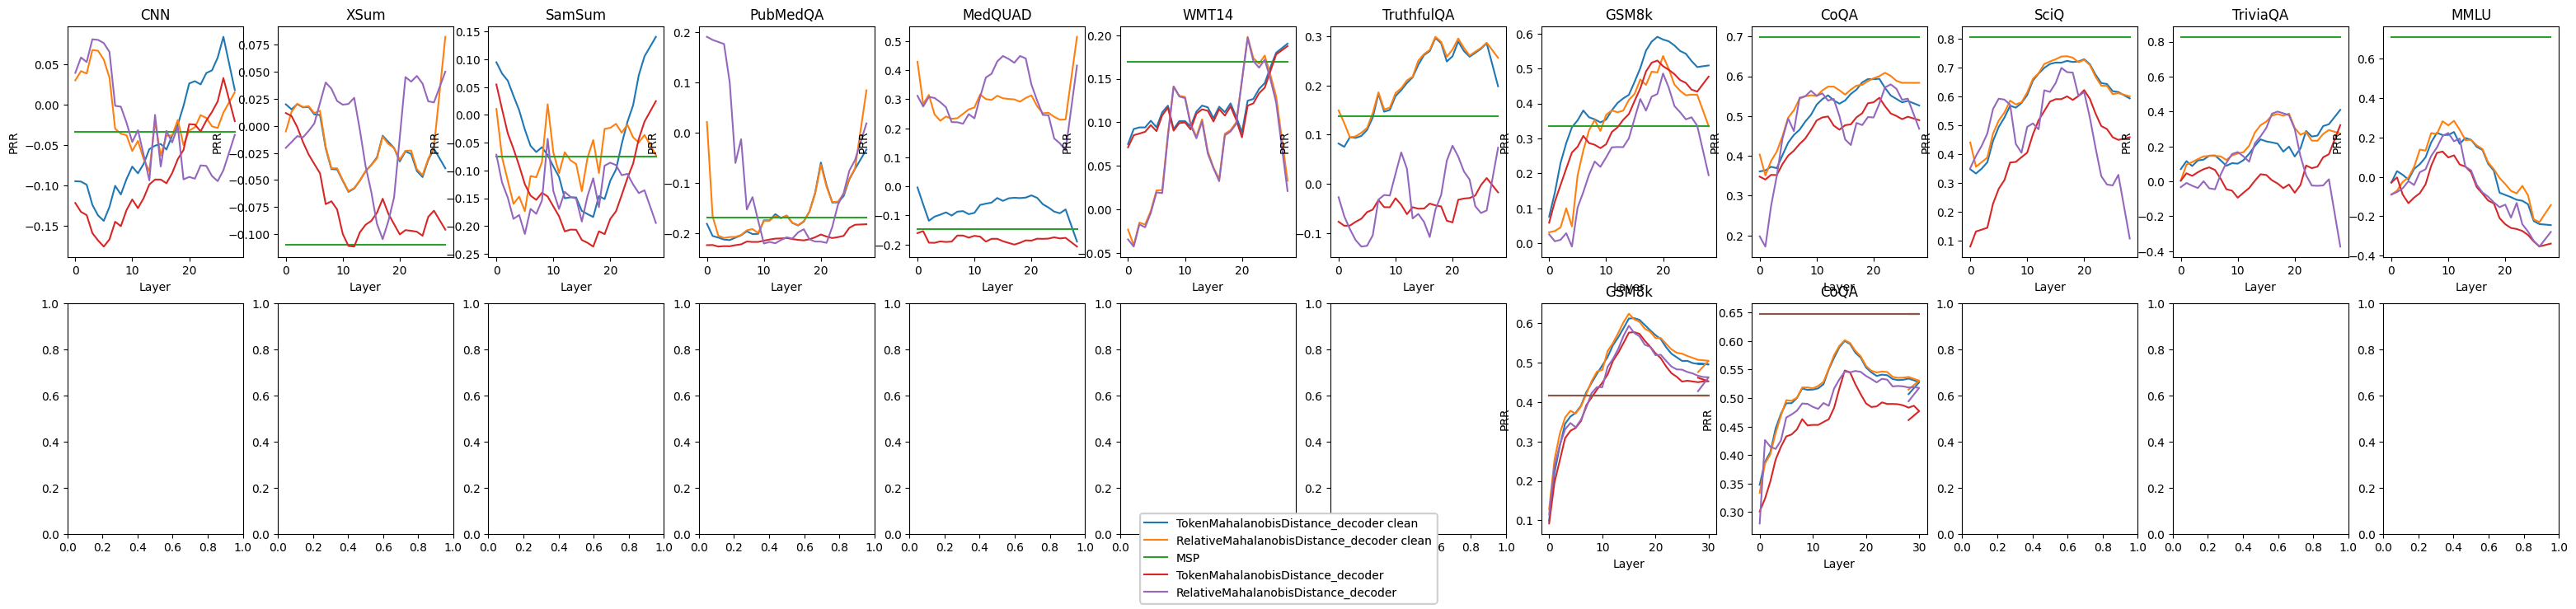

In [66]:
import matplotlib.pyplot as plt


paths_g = [
    "../workdir/output_layers/ats/google/gemma-7b/['cnn_dailymail', '3.0.0']/2024-07-07/11-41-26/ue_manager_seed1",
    "../workdir/output_layers/ats/google/gemma-7b/xsum/2024-07-06/11-31-14/ue_manager_seed1",
    "../workdir/output_layers/ats/google/gemma-7b/samsum/2024-07-08/12-16-27/ue_manager_seed1",
    "../workdir/output_layers/qa/google/gemma-7b/bigbio/pubmed_qa/2024-07-08/12-16-27/ue_manager_seed1",
    "../workdir/output_layers/qa/google/gemma-7b/keivalya/MedQuad-MedicalQnADataset/2024-07-06/22-55-47/ue_manager_seed1",
    "../workdir/output_layers/nmt/google/gemma-7b/['wmt14', 'de-en']/2024-07-06/22-55-47/ue_manager_seed1",
    "../workdir/output_layers/qa/google/gemma-7b/['truthful_qa', 'generation']/2024-07-08/01-42-11/ue_manager_seed1",
    "../workdir/output_layers/qa/google/gemma-7b/['gsm8k', 'main']/2024-07-06/11-31-14/ue_manager_seed1",
    "../workdir/output_layers/qa/google/gemma-7b/coqa/2024-07-05/17-04-45/ue_manager_seed1",
    "../workdir/output_layers/qa/google/gemma-7b/sciq/2024-07-06/07-38-03/ue_manager_seed1",
    "../workdir/output_layers/qa/google/gemma-7b/['trivia_qa', 'rc.nocontext']/2024-07-06/14-26-48/ue_manager_seed1",
    "../workdir/output_layers/qa/google/gemma-7b/['cais/mmlu', 'all']/2024-07-08/05-16-14/ue_manager_seed1"
]

paths_l = [
    "",
    "",
    "",
    "",
    "",
    "",
    "",
    "../workdir/output_layers/qa/meta-llama/Meta-Llama-3-8B/['gsm8k', 'main']/2024-07-07/22-06-40/ue_manager_seed1",
    "../workdir/output_layers/qa/meta-llama/Meta-Llama-3-8B/coqa/2024-07-08/16-59-16/ue_manager_seed1",
    "",
    "",
    "",
]

ds = ["CNN", "XSum", "SamSum", "PubMedQA", "MedQUAD", "WMT14", "TruthfulQA", "GSM8k", "CoQA", 'SciQ', "TriviaQA", "MMLU"]

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, Accuracy, 0.3)"):
        return (name in col) and (suf in col)
names = ["TokenMahalanobisDistance_decoder", "RelativeMahalanobisDistance_decoder"]

fig, ax = plt.subplots(nrows=2, ncols=12, figsize=(39, 8))

for k, (d_name, path) in enumerate(zip(ds, paths_g)):
    man = torch.load(path)
    metric_names = ['Accuracy', 'AlignScore']
    df = {}
    for key in man['metrics'].keys():
        if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
            scores = df.get(key[1], [])
            scores.append(man["metrics"][key])
            df[key[1]] = scores
            
    df0 = pd.DataFrame(df, index=[f'{d_name}, {m}, PRR' for m in metric_names])  
    if d_name in ["CNN", "XSum", "MedQUAD", "WMT14", "SamSum", "PubMedQA"]:
        suf = "(mean, AlignScore, 0.3)"
        i = 1
    elif d_name in ["TruthfulQA"]:
        suf = "(mean, AlignScore, 0.6)"
        i = 1
    else:
        suf = "(mean, Accuracy, 0.3)"
        #suf="(mean, Accuracy, 0.3)"
        i = 0
    for name in names:
        cols = [x for x in df0.columns if check_cond(x, name, suf)]
        layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 28 for x in cols]    
        ax[0, k].plot(layers, df0[cols].values[i], label=name +" clean")

    ax[0, k].plot(layers, [df0['MaximumSequenceProbability'].iloc[i]]*len(layers), label="MSP")


    if d_name in ["CNN", "XSum", "MedQUAD", "WMT14", "SamSum", "PubMedQA"]:
        suf = "(mean, , 0)"
        i = 1
    elif d_name in ["TruthfulQA"]:
        suf = "(mean, , 0)"
        i = 1
    else:
        suf = "(mean, , 0)"
        #suf="(mean, Accuracy, 0.3)"
        i = 0
    for name in names:
        cols = [x for x in df0.columns if check_cond(x, name, suf)]
        layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 28 for x in cols]
        ax[0, k].plot(layers, df0[cols].values[i], label=name)
        
    ax[0, k].set_xlabel("Layer")
    ax[0, k].set_ylabel("PRR")
    #ax[0, k].legend()
    ax[0, k].set_title(d_name)
    handles, labels = ax[0, k].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center')

for k, (d_name, path) in enumerate(zip(ds, paths_l)):
    if not len(path):
        continue
    man = torch.load(path)
    metric_names = ['Accuracy', 'AlignScore']
    df = {}
    for key in man['metrics'].keys():
        if (key[-1] == 'prr_normalized') and (key[-2] in metric_names):
            scores = df.get(key[1], [])
            scores.append(man["metrics"][key])
            df[key[1]] = scores
            
    df0 = pd.DataFrame(df, index=[f'{d_name}, {m}, PRR' for m in metric_names])  
    if d_name in ["CNN", "XSum", "MedQUAD", "WMT14", "SamSum", "PubMedQA"]:
        suf = "(mean, AlignScore, 0.3)"
        i = 1
    elif d_name in ["TruthfulQA"]:
        suf = "(mean, AlignScore, 0.6)"
        i = 1
    else:
        suf = "(mean, Accuracy, 0.3)"
        #suf="(mean, Accuracy, 0.3)"
        i = 0
    for name in names:
        cols = [x for x in df0.columns if check_cond(x, name, suf)]
        layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 28 for x in cols]    
        ax[1, k].plot(layers, df0[cols].values[i], label=name +" clean")

    ax[1, k].plot(layers, [df0['MaximumSequenceProbability'].iloc[i]]*len(layers), label="MSP")


    if d_name in ["CNN", "XSum", "MedQUAD", "WMT14", "SamSum", "PubMedQA"]:
        suf = "(mean, , 0)"
        i = 1
    elif d_name in ["TruthfulQA"]:
        suf = "(mean, , 0)"
        i = 1
    else:
        suf = "(mean, , 0)"
        #suf="(mean, Accuracy, 0.3)"
        i = 0
    for name in names:
        cols = [x for x in df0.columns if check_cond(x, name, suf)]
        layers = [int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 28 for x in cols]
        ax[1, k].plot(layers, df0[cols].values[i], label=name)
        
    ax[1, k].plot(layers, [df0['MaximumSequenceProbability'].iloc[i]]*len(layers), label="MSP")
    ax[1, k].set_xlabel("Layer")
    ax[1, k].set_ylabel("PRR")
    #ax[0, k].legend()
    ax[1, k].set_title(d_name)
    #handles, labels = ax[1, k].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')

In [45]:
data = torch.load(paths_g[5])

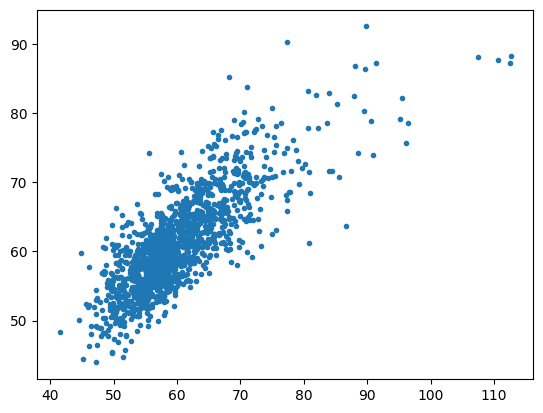

In [76]:
plt.plot(data["estimations"][('sequence', 'TokenMahalanobisDistance_decoder_19 (mean, Accuracy, 0.3)')], data["estimations"][('sequence', 'TokenMahalanobisDistance_decoder_26 (mean, Accuracy, 0.3)')], '.')

In [79]:
x = np.array([0,1,2,3])

np.mean([x, x], axis=0)

array([0., 1., 2., 3.])

In [70]:
from scipy import stats

for i in range(0, 27):
    res = stats.spearmanr(data["estimations"][('sequence', f'TokenMahalanobisDistance_decoder_{i} (mean, Accuracy, 0.3)')], data["estimations"][('sequence', 'TokenMahalanobisDistance_decoder_26 (mean, Accuracy, 0.3)')])
    print(i, res)

0 SignificanceResult(statistic=0.5883239164047777, pvalue=1.1887669896568716e-123)
1 SignificanceResult(statistic=0.6179168900266039, pvalue=9.981697136857276e-140)
2 SignificanceResult(statistic=0.7263102310814017, pvalue=1.1433281303358338e-216)
3 SignificanceResult(statistic=0.7668408379023506, pvalue=6.851694248305077e-256)
4 SignificanceResult(statistic=0.8087664712645608, pvalue=6.766480976721833e-306)
5 SignificanceResult(statistic=0.8350121085889395, pvalue=0.0)
6 SignificanceResult(statistic=0.8516739215757478, pvalue=0.0)
7 SignificanceResult(statistic=0.8536702519393674, pvalue=0.0)
8 SignificanceResult(statistic=0.831331851413418, pvalue=0.0)
9 SignificanceResult(statistic=0.799511345110778, pvalue=7.664538719511984e-294)
10 SignificanceResult(statistic=0.7920397935100403, pvalue=1.4539096213177617e-284)
11 SignificanceResult(statistic=0.7847433020025236, pvalue=7.273446198835599e-276)
12 SignificanceResult(statistic=0.7762849969532346, pvalue=3.389497040206605e-266)
13 Sig

In [75]:
for i in range(0, 27):
    print(i, data["metrics"][('sequence', f'TokenMahalanobisDistance_decoder_{i} (mean, Accuracy, 0.3)', 'Accuracy', 'prr_normalized')])

0 0.07638494187837333
1 0.1446084102147791
2 0.22935109819001603
3 0.28643317785032785
4 0.33185651868428045
5 0.3518091198728497
6 0.3798470080336639
7 0.36059571195203
8 0.3546118554900894
9 0.34592474620274294
10 0.35391148988442767
11 0.38042934483617363
12 0.4013310260439692
13 0.4144370256449713
14 0.4248290923243192
15 0.46201085794202007
16 0.5012705797055557
17 0.5512655484008924
18 0.5771019901459705
19 0.5908565292498663
20 0.5830788430329319
21 0.578020679196956
22 0.5660033991949046
23 0.5503111108462949
24 0.5423837795804004
25 0.5215101044991124
26 0.5043001970987899


# PersonBIO

In [4]:
seed = 1

base_path = "../workdir/fc/bio/mistralai/Mistral-7B-Instruct-v0.1/['rediska0123/person-bio']/"
time = "2024-07-05/10-23-35"#"2024-07-04/17-39-32"
#"2024-07-05/12-03-36"
data = {}


for fold in range(3):
    path1 = f"{base_path}/{time}/ue_manager_seed{seed}_fold{fold}"

    data1 = torch.load(path1)
    
    for k in data1.keys():
        if isinstance(data1[k], dict):
            if k not in data.keys():
                data[k] = {}
            for k1 in data1[k].keys():
                if isinstance(data1[k][k1], list):
                    if k1 not in data[k].keys():
                        data[k][k1] = data1[k][k1]
                    else:
                        data[k][k1] += data1[k][k1]
                else:
                    if k1 not in data[k].keys():
                        data[k][k1] = data1[k][k1]
                    else:
                        data[k][k1] += data1[k][k1]
                        
        elif isinstance(data1[k], list):
            data[k] = data1[k] + data2[k]
        else:
            print(k)

In [5]:
from lm_polygraph.ue_metrics import *

rocauc = ROCAUC()
prauc = PRAUC()

def preproc_method_name(x):
    return x

def get_table_upd(man, metric_names=['PR-AUC', "ROC-AUC"], dataset="CoQA", ue_metric="prr_normalized", 
                  update_alignscore=False, aggregated=False, return_score=False, level="claim"):
    df = {}
    methods = np.unique([x[1] for x in man['metrics'].keys() if "2side" not in x[1]])
    metric = np.array(man['gen_metrics'][('claim', 'OpenAIFactCheck')])  
    for method in methods:
        key = (level, method, "", ue_metric)
        level = "claim"
        if "relative" in method.lower():
            level = "sequence"
            print("")
        estimator_values = np.array(man['estimations'][(level, key[1])]).flatten()         
        rec_metrics_val = np.array(metric)

        ue = np.array(estimator_values)
        final_score = prauc(ue, rec_metrics_val) 
        scores = df.get(method, [])
        scores.append(final_score)
        df[method] = scores

    for method in methods:
        key = (level, method, "", ue_metric)
        level = "claim"
        if "relative" in method.lower():
            level = "sequence"
        estimator_values = np.array(man['estimations'][(level, key[1])]).flatten()         
        rec_metrics_val = np.array(metric)

        ue = np.array(estimator_values)
        final_score = rocauc(ue, rec_metrics_val) 
        scores = df.get(method, [])
        scores.append(final_score)
        df[method] = scores

    df0 = pd.DataFrame(df, index=pd.MultiIndex.from_tuples([(dataset, m) for m in metric_names])).T
    aggregation = ["mean" if "mean" in x else "sum(log(p_i))" if "sum(log(p_i))" in x else "-" for x in df0.index]
    method = [preproc_method_name(x) for x in df0.index]
    df0.loc[:, (dataset, 'Aggregation')] = aggregation
    df0.loc[:, (dataset, 'Method')] = method
    return df0.reset_index(drop=True)

In [6]:
get_table_upd(data).style.background_gradient(axis=0)

In [47]:
seed = 1

base_path = "../workdir/fc_new/bio/mistralai/Mistral-7B-Instruct-v0.1/['rediska0123/person-bio']/"
time = "2024-07-09/18-48-44"#"2024-07-09/16-58-57"#"2024-07-09/14-34-40"#"2024-07-09/13-04-52"
data = {}


for fold in range(1):
    path1 = f"{base_path}/{time}/ue_manager_seed{seed}_fold{fold}"

    data1 = torch.load(path1)
    
    for k in data1.keys():
        if isinstance(data1[k], dict):
            if k not in data.keys():
                data[k] = {}
            for k1 in data1[k].keys():
                if isinstance(data1[k][k1], list):
                    if k1 not in data[k].keys():
                        data[k][k1] = data1[k][k1]
                    else:
                        data[k][k1] += data1[k][k1]
                else:
                    if k1 not in data[k].keys():
                        data[k][k1] = data1[k][k1]
                    else:
                        data[k][k1] += data1[k][k1]
                        
        elif isinstance(data1[k], list):
            data[k] = data1[k] + data2[k]
        else:
            print(k)

In [48]:
from lm_polygraph.ue_metrics import *

rocauc = ROCAUC()
prauc = PRAUC()

def preproc_method_name(x):
    return x

def get_table_upd(man, metric_names=['PR-AUC', "ROC-AUC"], dataset="CoQA", ue_metric="prr_normalized", 
                  update_alignscore=False, aggregated=False, return_score=False, level="claim"):
    df = {}
    methods = np.unique([x[1] for x in man['estimations'].keys()])
    metric = np.array(man['gen_metrics'][('claim', 'OpenAIFactCheck')])  
    for method in methods:
        key = (level, method, "", ue_metric)
        level = "claim"
        if "relative" in method.lower() and "decoder_" in method.lower():
            level = "sequence"
            estimator_values = np.concatenate(man['estimations'][(level, key[1])])
        else:
            estimator_values = np.array(man['estimations'][(level, key[1])])
        
        rec_metrics_val = np.array(metric)

        ue = np.array(estimator_values)
        final_score = prauc(ue, rec_metrics_val) 
        scores = df.get(method, [])
        scores.append(final_score)
        df[method] = scores

    for method in methods:
        key = (level, method, "", ue_metric)
        level = "claim"
        if "relative" in method.lower() and "decoder_" in method.lower():
            level = "sequence"
            estimator_values = np.concatenate(man['estimations'][(level, key[1])])
        else:
            estimator_values = np.array(man['estimations'][(level, key[1])])       
        rec_metrics_val = np.array(metric)

        ue = np.array(estimator_values)
        final_score = rocauc(ue, rec_metrics_val) 
        scores = df.get(method, [])
        scores.append(final_score)
        df[method] = scores

    df0 = pd.DataFrame(df, index=pd.MultiIndex.from_tuples([(dataset, m) for m in metric_names])).T
    aggregation = ["mean" if "mean" in x else "sum(log(p_i))" if "sum(log(p_i))" in x else "-" for x in df0.index]
    method = [preproc_method_name(x) for x in df0.index]
    df0.loc[:, (dataset, 'Aggregation')] = aggregation
    df0.loc[:, (dataset, 'Method')] = method
    return df0.reset_index(drop=True)

In [49]:
df0 = get_table_upd(data)
df0.style.background_gradient(axis=0)

/tmp/ipykernel_722/3183765198.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0.iloc[0][1]]*len(layers), label="MSP")


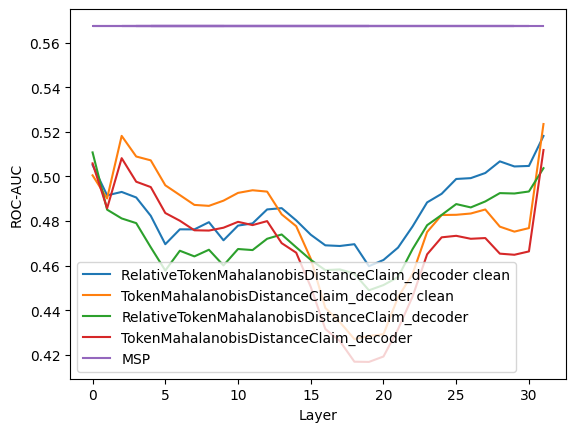

In [50]:
import matplotlib.pyplot as plt

def check_cond(col, name="TokenMahalanobisDistance_decoder", suf="(mean, 0.5)"):
    return (col.startswith(name)) and (suf in col)
    
names = ["RelativeTokenMahalanobisDistanceClaim_decoder", "TokenMahalanobisDistanceClaim_decoder"]
suf = "(mean, 0.5)"
for name in names:
    rows = [i for i, x in enumerate(df0[('CoQA', 'Method')].values) if check_cond(x, name, suf)]
    layers = np.array([int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 31 for x in df0[('CoQA', 'Method')].values[rows]])
    order = np.argsort(layers)
    y = df0[('CoQA', 'ROC-AUC')].values[rows]
    plt.plot(layers[order], y[order], label=name + " clean")

suf = "(mean, 0.0)"
for name in names:
    rows = [i for i, x in enumerate(df0[('CoQA', 'Method')].values) if check_cond(x, name, suf)]
    layers = np.array([int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 31 for x in df0[('CoQA', 'Method')].values[rows]])
    order = np.argsort(layers)
    y = df0[('CoQA', 'ROC-AUC')].values[rows]
    plt.plot(layers[order], y[order], label=name)


plt.plot(layers, [df0.iloc[0][1]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("ROC-AUC")
plt.legend()

/tmp/ipykernel_722/280482669.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(layers, [df0.iloc[0][0]]*len(layers), label="MSP")


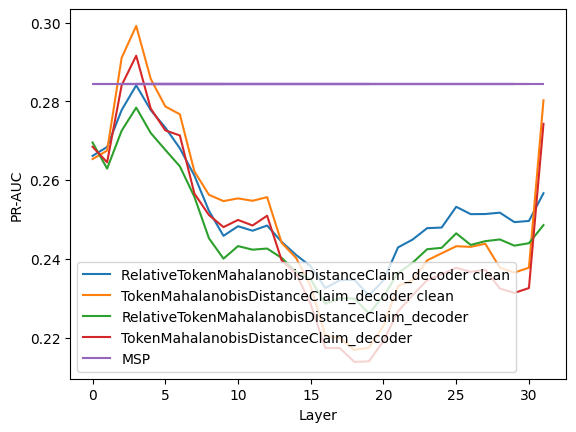

In [51]:
suf = "(mean, 0.5)"
for name in names:
    rows = [i for i, x in enumerate(df0[('CoQA', 'Method')].values) if check_cond(x, name, suf)]
    layers = np.array([int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 31 for x in df0[('CoQA', 'Method')].values[rows]])
    order = np.argsort(layers)
    y = df0[('CoQA', 'PR-AUC')].values[rows]
    plt.plot(layers[order], y[order], label=name + " clean")

suf = "(mean, 0.0)"
for name in names:
    rows = [i for i, x in enumerate(df0[('CoQA', 'Method')].values) if check_cond(x, name, suf)]
    layers = np.array([int(x.split("_")[2].split(" ")[0]) if len(x.split("_")) > 2 else 31 for x in df0[('CoQA', 'Method')].values[rows]])
    order = np.argsort(layers)
    y = df0[('CoQA', 'PR-AUC')].values[rows]
    plt.plot(layers[order], y[order], label=name)

plt.plot(layers, [df0.iloc[0][0]]*len(layers), label="MSP")
plt.xlabel("Layer")
plt.ylabel("PR-AUC")
plt.legend()

In [52]:
len(data["stats"]["greedy_texts"])

20